<a href="https://colab.research.google.com/github/SBOlorunju/New-Hello-World/blob/master/Begin__Analysis_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **An Analysis of Kiva Crowdfunded Loans** 

###### *Cory Stahle: Udemy Course Project Demo*
---



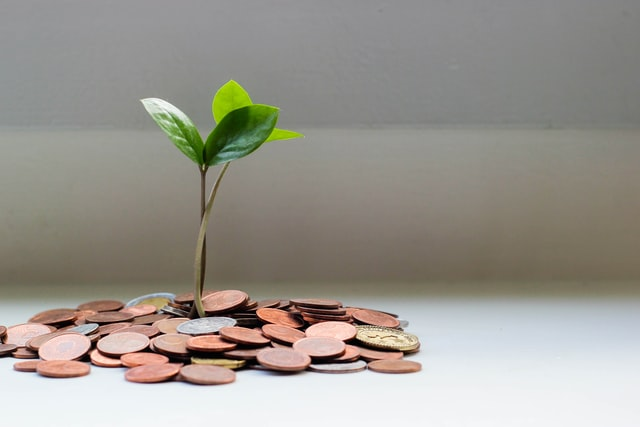

<span>Photo by <a href="https://unsplash.com/@micheile?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Micheile Henderson</a> on <a href="https://unsplash.com/s/photos/money?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span>

<br><br>

***Project structure:***


1.   Define the objective
2.   Import packages and data
3.   Explore and clean
4.   Analyze

<br>

## **Objective**
---

*Analyze the [Kiva.org](https://www.kiva.org/) lending platform. Understand how much money has been borrowed, for what purpose, and where the borrowers live.*

<br>

In particular, we want to answer the following groups of questions:



1.   How much money has been borrowed through Kiva's lending platform? How has the amount of funding changed over time?
2.   How much funding has been provided by category (theme)?
3.   How does funding vary by world region? What are the most popular themes in each region?


<br><br>

## **Import Packages and Data**
---


The data for this project comes from [Kaggle.com](https://www.kaggle.com/kiva/data-science-for-good-kiva-crowdfunding). It includes information about loans funded between January 1, 2016 and July 26th, 2017.

The data is also stored on the GitHub page for the course [here](https://github.com/The-Calculated-Life/python_analysis_for_excel/tree/main/data)

In [ ]:
!pip install squarify

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import squarify

plt.rcParams['figure.figsize'] = [12, 6]

In [ ]:
kiva_loans_path = 'https://raw.githubusercontent.com/The-Calculated-Life/python_analysis_for_excel/main/data/kiva_loans.csv'
locations_path = 'https://raw.githubusercontent.com/The-Calculated-Life/python_analysis_for_excel/main/data/kiva_mpi_region_locations.csv'

kiva_loans = pd.read_csv(kiva_loans_path)
locations = pd.read_csv(locations_path)

<br><br>

## **Explore and Clean Data**
---

### kiva_loans dataframe

In [ ]:
kiva_loans.head()

,id,funded_amount,loan_amount,activity,sector,country_code,country,region,currency,partner_id,term_in_months,lender_count,repayment_interval,date
0,1002924,500,500,Rickshaw,Transportation,PK,Pakistan,Multan,PKR,247.0,14,1,monthly,1/1/2016
1,1002908,500,500,Rickshaw,Transportation,PK,Pakistan,Lahore,PKR,247.0,11,1,irregular,1/1/2016
2,1002897,500,500,Fruits & Vegetables,Food,PK,Pakistan,Multan,PKR,247.0,15,17,monthly,1/1/2016
3,1002916,500,500,Clothing Sales,Clothing,PK,Pakistan,Lahore,PKR,247.0,11,16,irregular,1/1/2016
4,1002891,575,575,Fruits & Vegetables,Food,PK,Pakistan,Lahore,PKR,247.0,11,21,irregular,1/1/2016


In [ ]:
kiva_loans.shape

(315138, 14)

In [ ]:
kiva_loans.isnull().sum()

id                        0
funded_amount             0
loan_amount               0
activity                  0
sector                    0
country_code              4
country                   0
region                16367
currency                  0
partner_id             3070
term_in_months            0
lender_count              0
repayment_interval        0
date                      0
dtype: int64

In [ ]:
kiva_loans['date'] = pd.to_datetime(kiva_loans['date'])
kiva_loans = kiva_loans.set_index('date')

In [ ]:
kiva_loans.head()

,id,funded_amount,loan_amount,activity,sector,country_code,country,region,currency,partner_id,term_in_months,lender_count,repayment_interval
date,,,,,,,,,,,,,
2016-01-01,1002924,500,500,Rickshaw,Transportation,PK,Pakistan,Multan,PKR,247.0,14,1,monthly
2016-01-01,1002908,500,500,Rickshaw,Transportation,PK,Pakistan,Lahore,PKR,247.0,11,1,irregular
2016-01-01,1002897,500,500,Fruits & Vegetables,Food,PK,Pakistan,Multan,PKR,247.0,15,17,monthly
2016-01-01,1002916,500,500,Clothing Sales,Clothing,PK,Pakistan,Lahore,PKR,247.0,11,16,irregular
2016-01-01,1002891,575,575,Fruits & Vegetables,Food,PK,Pakistan,Lahore,PKR,247.0,11,21,irregular


<br><br>

### locations dataframe

In [ ]:
locations.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [ ]:
locations.shape

(2772, 9)

In [ ]:
locations.isnull().sum()

LocationName    1788
ISO             1764
country         1764
region          1788
world_region    1764
MPI             1788
geo                0
lat             1880
lon             1880
dtype: int64

In [ ]:
locations[(locations['world_region'].isnull()) & (locations['country'].notnull())]

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon


In [ ]:
locations = locations.dropna()

In [ ]:
locations.shape

(892, 9)

<br><br>


## **Analysis**
---

### **Q. How much money has been borrowed through Kiva's lending platform?**


In [ ]:
kiva_loans.head()

,id,funded_amount,loan_amount,activity,sector,country_code,country,region,currency,partner_id,term_in_months,lender_count,repayment_interval
date,,,,,,,,,,,,,
2016-01-01,1002924,500,500,Rickshaw,Transportation,PK,Pakistan,Multan,PKR,247.0,14,1,monthly
2016-01-01,1002908,500,500,Rickshaw,Transportation,PK,Pakistan,Lahore,PKR,247.0,11,1,irregular
2016-01-01,1002897,500,500,Fruits & Vegetables,Food,PK,Pakistan,Multan,PKR,247.0,15,17,monthly
2016-01-01,1002916,500,500,Clothing Sales,Clothing,PK,Pakistan,Lahore,PKR,247.0,11,16,irregular
2016-01-01,1002891,575,575,Fruits & Vegetables,Food,PK,Pakistan,Lahore,PKR,247.0,11,21,irregular


In [ ]:
total_loans=kiva_loans['funded_amount'].sum()/1000000
print('There has been $'+str(round(total_loans,1)) + 'million in loans by Kiva')

There has been $232.5million in loans by Kiva


<br><br>

### **Q. How has the amount of funding changed over time?**


<function matplotlib.pyplot.show>

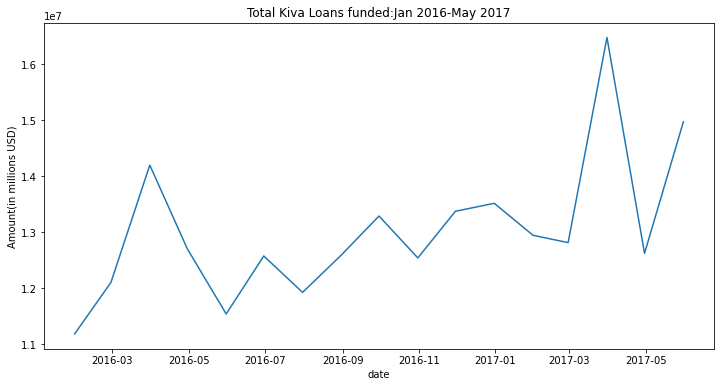

In [ ]:
loans_by_day=kiva_loans.groupby('date')['funded_amount'].sum()
#plt.plot(loans_by_day)
#plt.show
loans_by_month=loans_by_day.resample('M').sum()
loans_by_month=loans_by_month[loans_by_month.index<'2017-06-01']
plt.plot(loans_by_month)
plt.title('Total Kiva Loans funded:Jan 2016-May 2017')
plt.xlabel('date')
plt.ylabel('Amount(in millions USD)')
plt.show

<br><br>

### **Q. How much funding has been provided by sector?**

In [ ]:
loans_by_sector=kiva_loans.groupby('sector')['funded_amount'].sum()
loans_by_sector.sort_values(ascending=False, inplace=True)

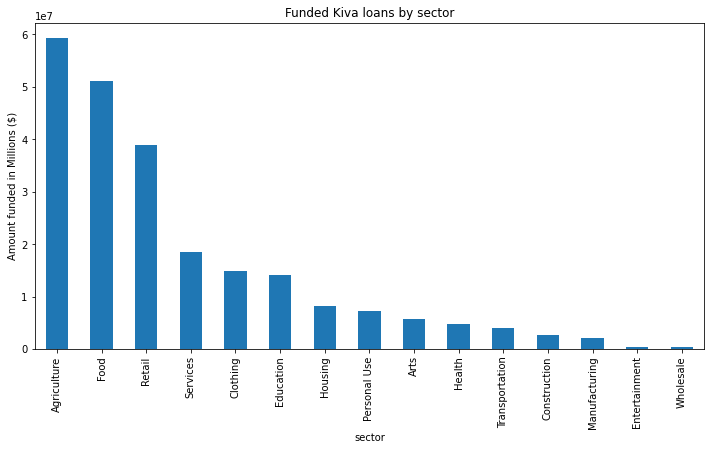

In [ ]:
loans_by_sector.plot.bar()
plt.title('Funded Kiva loans by sector')
plt.ylabel('Amount funded in Millions ($)')
plt.show()

<br><br>

### **Q. How does funding vary by world region?**


In [ ]:
kiva_loans.groupby('region')['funded_amount'].sum()

region
"The first May" village        2425
01 Công Chính                 11100
01 Công Liêm                  41575
01 Cẩm Bào, Vạn Hòa           39600
01 Hoàng Giang                11650
                              ...  
ÁI Sơn - P. Đông Hải- TPTH     2025
Đông Lĩnh, Thôn Quý              75
Đông Sơn, Thanh Hóa           28350
Đông Văn - Đông Sơn            4925
İZMİT                           575
Name: funded_amount, Length: 7979, dtype: int64

In [ ]:
kiva_loans.head()

,id,funded_amount,loan_amount,activity,sector,country_code,country,region,currency,partner_id,term_in_months,lender_count,repayment_interval
date,,,,,,,,,,,,,
2016-01-01,1002924,500,500,Rickshaw,Transportation,PK,Pakistan,Multan,PKR,247.0,14,1,monthly
2016-01-01,1002908,500,500,Rickshaw,Transportation,PK,Pakistan,Lahore,PKR,247.0,11,1,irregular
2016-01-01,1002897,500,500,Fruits & Vegetables,Food,PK,Pakistan,Multan,PKR,247.0,15,17,monthly
2016-01-01,1002916,500,500,Clothing Sales,Clothing,PK,Pakistan,Lahore,PKR,247.0,11,16,irregular
2016-01-01,1002891,575,575,Fruits & Vegetables,Food,PK,Pakistan,Lahore,PKR,247.0,11,21,irregular


In [ ]:
locations.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [ ]:
loans_and_locations=kiva_loans.merge(locations, how='left', on='country')

In [ ]:
loans_by_wregion=loans_and_locations.groupby('world_region')['funded_amount'].sum()

In [ ]:
colors = [(0.953125720876586, 0.9822068435217225, 0.9426989619377163, 1.0),
 (0.12110726643598617, 0.5312572087658592, 0.2590542099192618, 1.0),
 (0.9686274509803922, 0.9882352941176471, 0.9607843137254902, 1.0),
 (0.0, 0.26666666666666666, 0.10588235294117647, 1.0),
 (0.9664129181084199, 0.9873740868896579, 0.9582006920415225, 1.0),
 (0.4798154555940023, 0.7802537485582468, 0.48322952710495964, 1.0)]

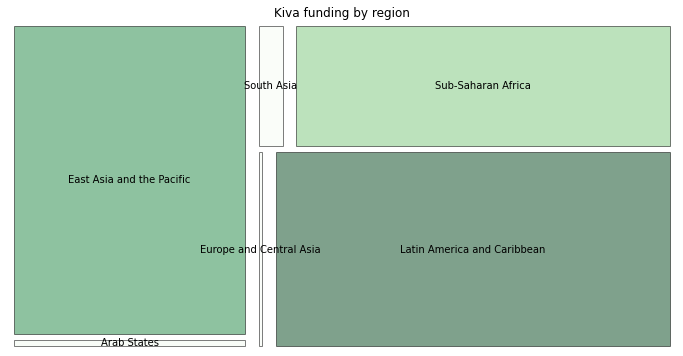

In [ ]:
squarify.plot(sizes=loans_by_wregion
              , label=loans_by_wregion.index
              , color=colors
              , alpha= 0.5
              , edgecolor= 'black'
              , pad= True)
plt.title('Kiva funding by region')
plt.axis('off')

plt.show()

<br><br>

### **Q. What are the most popular sectors in each region?**

In [ ]:
loans_and_locations.pivot_table(index='sector'
                                , column='world_region'
                                , values='funded_amount'
                                , aggfunc='sum') 

world_region,Arab States,East Asia and the Pacific,Europe and Central Asia,Latin America and Caribbean,South Asia,Sub-Saharan Africa
sector,,,,,,
Agriculture,6784275.0,186525925.0,10104125.0,191911475.0,5089500.0,131610300.0
Arts,237375.0,12015150.0,58000.0,35757100.0,4206725.0,2974175.0
Clothing,2251100.0,9438275.0,1288625.0,56567075.0,1869150.0,30446825.0
Construction,1116750.0,4430550.0,140500.0,9290775.0,414300.0,3877275.0
Education,2400075.0,11658050.0,4185375.0,24057700.0,6787350.0,21176625.0
Entertainment,18900.0,534650.0,11000.0,830425.0,39900.0,309775.0
Food,5181575.0,129857925.0,2463375.0,178052350.0,3892750.0,113519775.0
Health,34050.0,2538225.0,4009250.0,5334875.0,152275.0,4596550.0
Housing,276500.0,54968975.0,1842250.0,14732075.0,7200.0,5860400.0
